In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel('British-Airways_Summer_Schedule_Dataset.xlsx')

dest_cols = [col for col in df.columns if any(word in col.lower() 
             for word in ['destination', 'dest', 'to', 'arrival'])]
time_cols = [col for col in df.columns if any(word in col.lower() 
             for word in ['time', 'departure', 'depart', 'schedule'])]

In [3]:
print(f"Identified columns:")
print(f"  Destination: {dest_cols}")
print(f"  Time: {time_cols}")

Identified columns:
  Destination: ['ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION']
  Time: ['FLIGHT_TIME', 'TIME_OF_DAY', 'DEPARTURE_STATION_CD']


In [4]:
regional_mapping = {'Europe': ['AMS', 'CDG', 'FRA', 'MAD', 'BCN', 'FCO', 'MUC', 'ZRH',
                               'VIE', 'CPH', 'ARN', 'OSL', 'HEL', 'DUB', 'BRU', 'LIS',
                               'ATH', 'PRG', 'WAW', 'BUD', 'Amsterdam', 'Paris', 'Frankfurt',
                               'Madrid', 'Barcelona', 'Rome', 'Munich', 'Zurich', 'Vienna',
                               'Copenhagen', 'Stockholm', 'Oslo', 'Helsinki', 'Dublin',
                               'Brussels', 'Lisbon', 'Athens', 'Prague', 'Warsaw', 'Budapest',
                               'Milan', 'Geneva', 'Nice', 'Berlin', 'Hamburg', 'Manchester',
                               'Edinburgh', 'Glasgow', 'Venice', 'Florence', 'Naples', 'Porto',
                               'Seville', 'Valencia', 'Bilbao'],
                    'North America': ['JFK', 'LAX', 'ORD', 'DFW', 'YYZ', 'YVR', 'SFO', 'BOS',
                                      'MIA','SEA', 'ATL', 'IAD', 'EWR', 'YUL', 'PHX', 'DEN',
                                      'LAS', 'IAH','New York', 'Los Angeles', 'Chicago',
                                      'Toronto', 'Vancouver', 'San Francisco', 'Boston',
                                      'Miami', 'Seattle', 'Atlanta', 'Montreal','Washington',
                                      'Houston', 'Dallas', 'Philadelphia', 'Phoenix', 'Denver',
                                      'San Diego', 'Portland', 'Austin', 'Nashville', 'Orlando'],
                    'Asia': ['NRT', 'HND', 'ICN', 'PVG', 'PEK', 'HKG', 'SIN', 'BKK', 'DEL',
                             'BOM', 'KUL', 'CGK', 'MNL', 'TPE', 'KIX', 'CAN', 'SHA', 'BLR',
                             'HYD', 'Tokyo', 'Seoul', 'Shanghai', 'Beijing', 'Hong Kong',
                             'Singapore', 'Bangkok', 'Delhi', 'Mumbai', 'Kuala Lumpur',
                             'Jakarta', 'Manila', 'Taipei', 'Bangalore', 'Hyderabad',
                             'Chennai','Kolkata', 'Osaka'],
                    'Middle East': ['DXB', 'DOH', 'AUH', 'KWI', 'RUH', 'JED', 'CAI', 'AMM',
                                    'BEY', 'TLV', 'Dubai', 'Doha', 'Abu Dhabi', 'Kuwait',
                                    'Riyadh', 'Jeddah', 'Cairo', 'Amman', 'Beirut', 'Tel Aviv',
                                    'Muscat', 'Bahrain', 'MCT', 'BAH'],
                    'Africa': ['JNB', 'CPT', 'LOS', 'ACC', 'NBO', 'ADD', 'ALG', 'TUN', 'CMN',
                               'DAR', 'Johannesburg', 'Cape Town', 'Lagos', 'Accra', 'Nairobi',
                               'Addis Ababa', 'Algiers', 'Tunis', 'Casablanca', 'Dar es Salaam',
                               'Durban', 'Lusaka', 'Marrakech', 'Abidjan', 'Dakar'],
                    'South America': ['GRU', 'GIG', 'EZE', 'SCL', 'BOG', 'LIM', 'UIO', 'CCS',
                                      'MVD','Sao Paulo', 'Rio de Janeiro', 'Buenos Aires',
                                      'Santiago', 'Bogota', 'Lima', 'Quito', 'Caracas',
                                      'Montevideo', 'Brasilia'],
                    'Oceania': ['SYD', 'MEL', 'BNE', 'AKL', 'PER', 'ADL', 'CHC', 'WLG',
                                'Sydney', 'Melbourne', 'Brisbane', 'Auckland', 'Perth',
                                'Adelaide', 'Christchurch', 'Wellington']}


In [5]:
def categorize_destination(dest):
    if pd.isna(dest):
        return 'Unknown'
    dest_str = str(dest).upper()
    for region, patterns in regional_mapping.items():
        if any(pattern.upper() in dest_str for pattern in patterns):
            return region
    return 'Other'

if dest_cols:
    dest_col = dest_cols[0]
    df['Region'] = df[dest_col].apply(categorize_destination)
    print(f"\n✓ Categorized {len(df)} flights into regions")
    print(f"\nRegion distribution:")
    for region, count in df['Region'].value_counts().items():
        print(f"  {region:20s}: {count:5,d} flights")


✓ Categorized 10000 flights into regions

Region distribution:
  Europe              : 5,325 flights
  North America       : 2,658 flights
  Middle East         :   688 flights
  Asia                :   679 flights
  Other               :   650 flights


In [6]:
def categorize_time(hour):
    if pd.isna(hour):
        return 'Unknown'
    hour = int(hour)
    if 0 <= hour < 6:
        return 'Early Morning (00:00-05:59)'
    elif 6 <= hour < 12:
        return 'Morning (06:00-11:59)'
    elif 12 <= hour < 17:
        return 'Afternoon (12:00-16:59)'
    elif 17 <= hour < 21:
        return 'Evening (17:00-20:59)'
    else:
        return 'Night (21:00-23:59)'

In [7]:
if time_cols:
    time_col = time_cols[0]
    try:
        time_series = pd.to_datetime(df[time_col], errors='coerce')
        df['Hour'] = time_series.dt.hour
        df['Time_Period'] = df['Hour'].apply(categorize_time)
        
        print(f"\n✓ Categorized flights into time periods")
        print(f"\nTime period distribution:")
        for period, count in df['Time_Period'].value_counts().items():
            print(f"  {period:35s}: {count:5,d} flights")
    except Exception as e:
        print(f"Error parsing time data: {e}")
        df['Time_Period'] = 'Unknown'


✓ Categorized flights into time periods

Time period distribution:
  Unknown                            : 10,000 flights


In [8]:
# Check if the required columns exist before proceeding
if 'Region' in df.columns and 'Time_Period' in df.columns:
    
    # Create the main crosstab with totals
    crosstab = pd.crosstab(df['Time_Period'], df['Region'], margins=True, margins_name='TOTAL')
    
    # Define the logical order for the time periods
    time_order = ['Early Morning (00:00-05:59)', 'Morning (06:00-11:59)', 'Afternoon (12:00-16:59)',
                  'Evening (17:00-20:59)', 'Night (21:00-23:59)', 'Unknown', 'TOTAL']
    
    # Reorder the rows (index) to follow the logical time_order
    existing_periods = [p for p in time_order if p in crosstab.index]
    crosstab = crosstab.reindex(existing_periods)
    
    print("\n📊 SUMMARY TABLE: Number of Flights by Time Period and Region")
    print("="*80)
    print(crosstab.to_string())
    
    # Save the summary table to a CSV file
    crosstab.to_csv('ba_time_region_summary.csv')
    print("\n✓ Saved summary table to: ba_time_region_summary.csv")

else:
    print("Error: 'Region' or 'Time_Period' columns not found in DataFrame.")


📊 SUMMARY TABLE: Number of Flights by Time Period and Region
Region       Asia  Europe  Middle East  North America  Other  TOTAL
Time_Period                                                        
Unknown       679    5325          688           2658    650  10000
TOTAL         679    5325          688           2658    650  10000

✓ Saved summary table to: ba_time_region_summary.csv


In [9]:
print(f"\n{'='*80}")
print("📊 PERCENTAGE TABLE: Distribution by Time Period and Region")
print(f"{'='*80}")

# Calculate percentages (excluding totals)
crosstab_pct = pd.crosstab(df['Time_Period'], df['Region'], normalize='all') * 100
crosstab_pct = crosstab_pct.reindex([p for p in time_order if p in crosstab_pct.index])

print("\nPercentage of total flights:")
print(crosstab_pct.round(2).to_string())

# Save percentage table
crosstab_pct.to_csv('ba_time_region_percentage.csv')
print("\n✓ Saved percentage table to: ba_time_region_percentage.csv")


📊 PERCENTAGE TABLE: Distribution by Time Period and Region

Percentage of total flights:
Region       Asia  Europe  Middle East  North America  Other
Time_Period                                                 
Unknown      6.79   53.25         6.88          26.58    6.5

✓ Saved percentage table to: ba_time_region_percentage.csv


In [10]:
print(f"\n{'='*80}")
print("📊 ROW PERCENTAGES: Regional Distribution within Each Time Period")
print(f"{'='*80}")

crosstab_row_pct = pd.crosstab(df['Time_Period'], df['Region'], normalize='index') * 100
crosstab_row_pct = crosstab_row_pct.reindex([p for p in time_order if p in crosstab_row_pct.index])

print("\nPercentage within each time period (rows sum to 100%):")
print(crosstab_row_pct.round(2).to_string())


📊 ROW PERCENTAGES: Regional Distribution within Each Time Period

Percentage within each time period (rows sum to 100%):
Region       Asia  Europe  Middle East  North America  Other
Time_Period                                                 
Unknown      6.79   53.25         6.88          26.58    6.5


In [11]:
print(f"\n{'='*80}")
print("📊 COLUMN PERCENTAGES: Time Distribution within Each Region")
print(f"{'='*80}")

crosstab_col_pct = pd.crosstab(df['Time_Period'], df['Region'], normalize='columns') * 100
crosstab_col_pct = crosstab_col_pct.reindex([p for p in time_order if p in crosstab_col_pct.index])

print("\nPercentage within each region (columns sum to 100%):")
print(crosstab_col_pct.round(2).to_string())


📊 COLUMN PERCENTAGES: Time Distribution within Each Region

Percentage within each region (columns sum to 100%):
Region        Asia  Europe  Middle East  North America  Other
Time_Period                                                  
Unknown      100.0   100.0        100.0          100.0  100.0



CREATING VISUALIZATION: Heatmap

✓ Saved heatmap: ba_time_region_heatmap.png


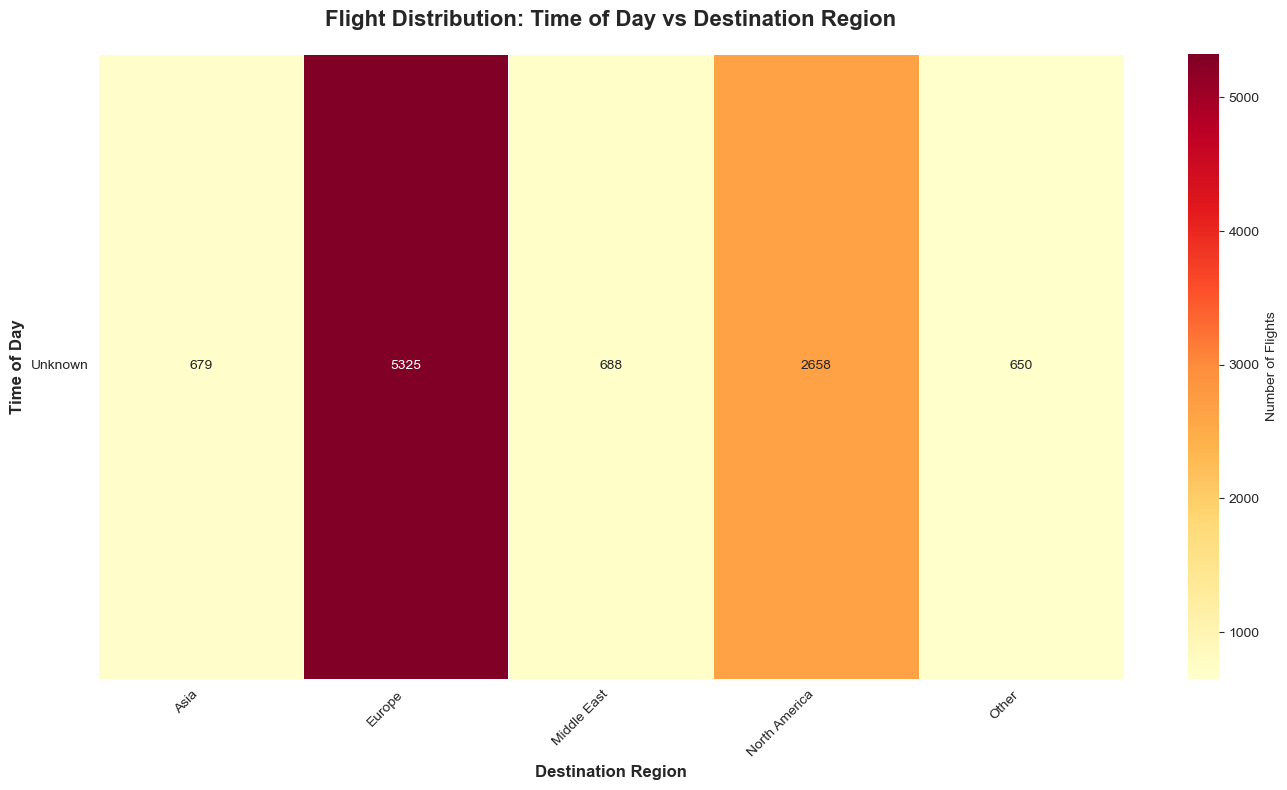

In [12]:
print(f"\n{'='*80}")
print("CREATING VISUALIZATION: Heatmap")
print(f"{'='*80}")

# Drop the 'TOTAL' rows/columns for a cleaner visualization
crosstab_no_total = crosstab.drop('TOTAL', axis=0, errors='ignore').drop('TOTAL', axis=1, errors='ignore')

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(crosstab_no_total, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Flights'}, ax=ax, linewidths=0.5)

ax.set_title('Flight Distribution: Time of Day vs Destination Region', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Destination Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Time of Day', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('ba_time_region_heatmap.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved heatmap: ba_time_region_heatmap.png")
plt.show() # Use plt.show() to display in the notebook
plt.close() # Close the figure to free up memory


CREATING VISUALIZATION: Stacked Bar by Time

✓ Saved stacked bar chart: ba_time_stacked_bar.png


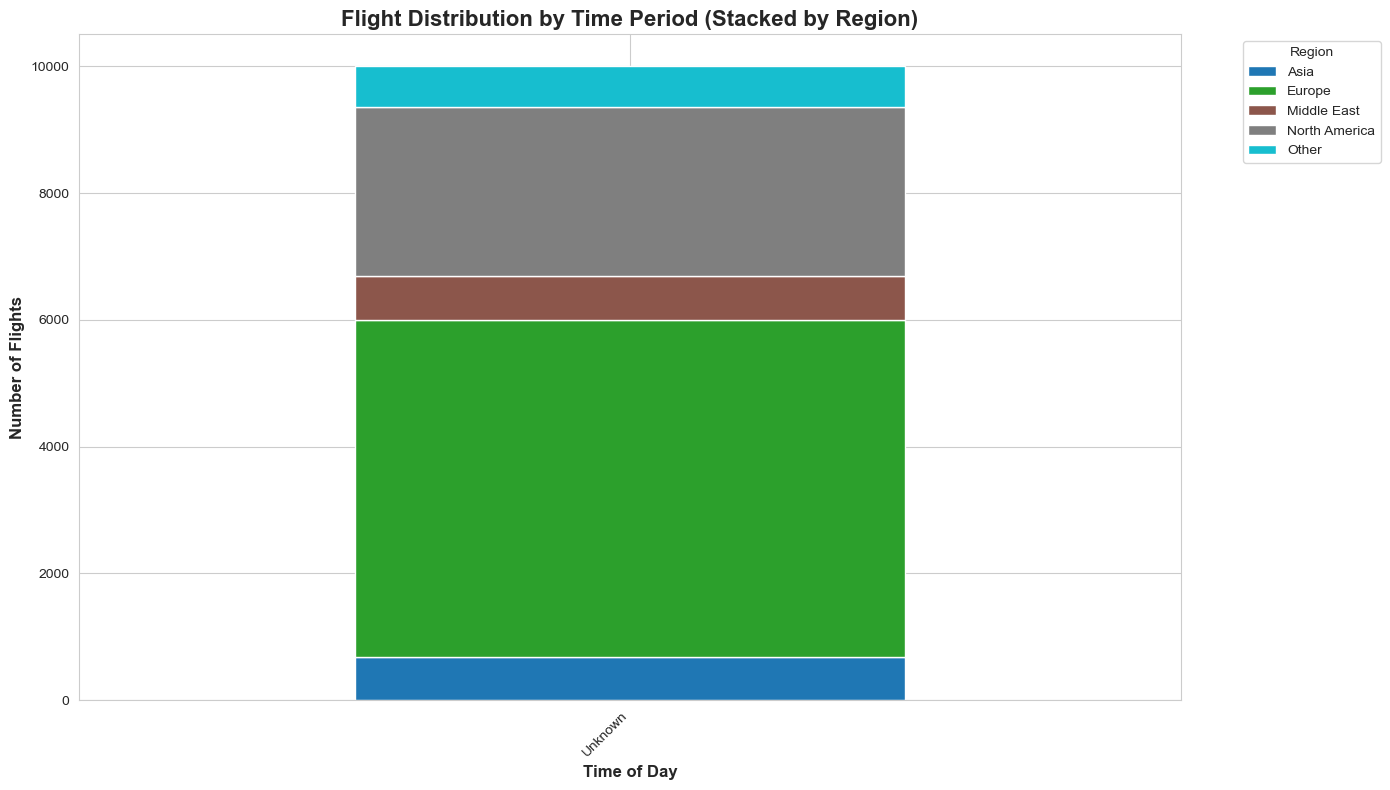

In [13]:
print(f"\n{'='*80}")
print("CREATING VISUALIZATION: Stacked Bar by Time")
print(f"{'='*80}")

fig, ax = plt.subplots(figsize=(14, 8))
crosstab_no_total.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_title('Flight Distribution by Time Period (Stacked by Region)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Time of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Flights', fontsize=12, fontweight='bold')
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('ba_time_stacked_bar.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved stacked bar chart: ba_time_stacked_bar.png")
plt.show()
plt.close()


CREATING VISUALIZATION: Grouped Bar Chart

✓ Saved grouped bar chart: ba_time_grouped_bar.png


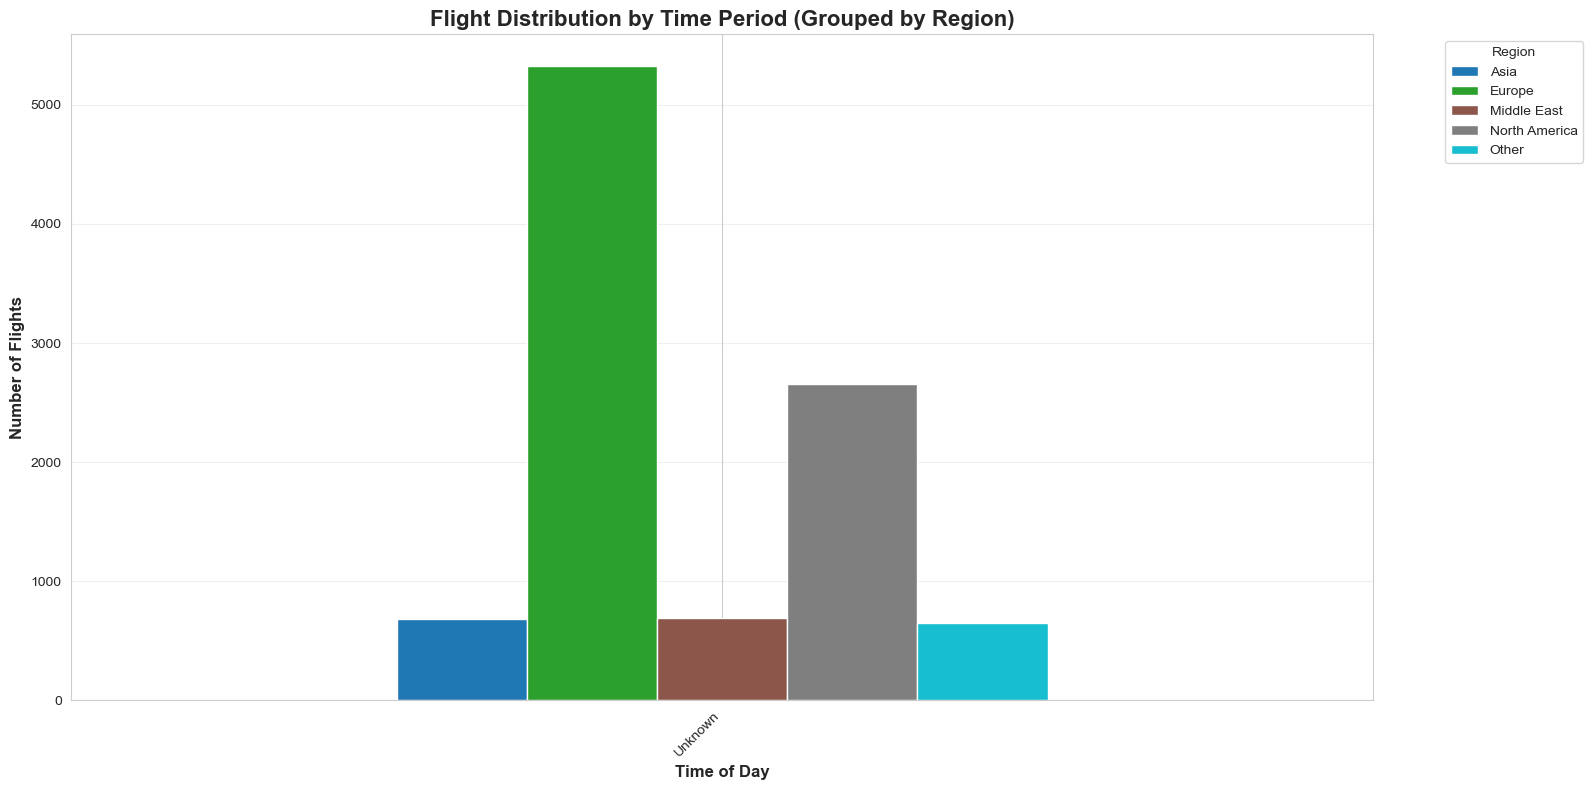

In [14]:
print(f"\n{'='*80}")
print("CREATING VISUALIZATION: Grouped Bar Chart")
print(f"{'='*80}")

fig, ax = plt.subplots(figsize=(16, 8))
crosstab_no_total.plot(kind='bar', ax=ax, colormap='tab10')

ax.set_title('Flight Distribution by Time Period (Grouped by Region)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Time of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Flights', fontsize=12, fontweight='bold')
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('ba_time_grouped_bar.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved grouped bar chart: ba_time_grouped_bar.png")
plt.show()
plt.close()


CREATING VISUALIZATION: Stacked Bar by Region

✓ Saved regional stacked bar chart: ba_region_stacked_bar.png


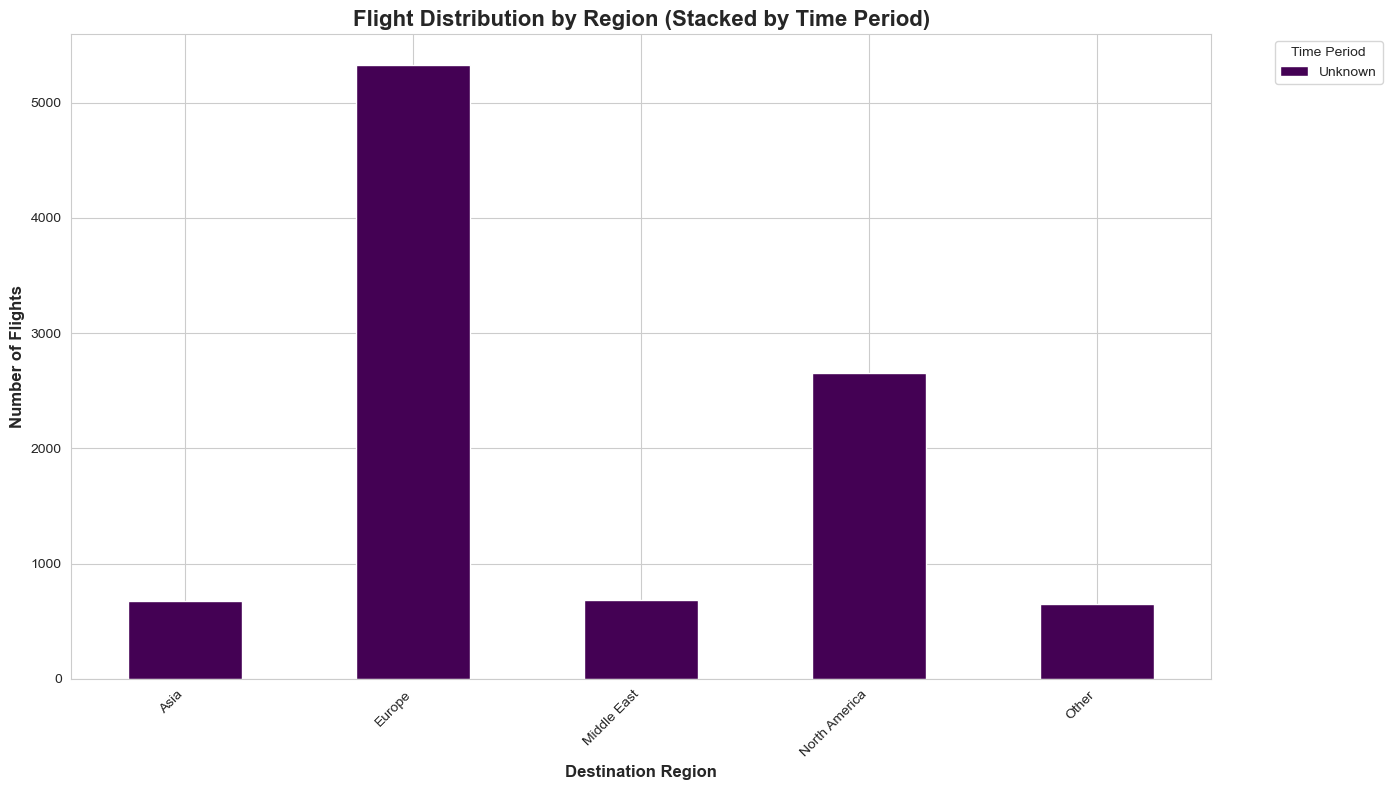

In [15]:
print(f"\n{'='*80}")
print("CREATING VISUALIZATION: Stacked Bar by Region")
print(f"{'='*80}")

fig, ax = plt.subplots(figsize=(14, 8))
# Transpose the DataFrame to plot by region on the x-axis
crosstab_no_total.T.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

ax.set_title('Flight Distribution by Region (Stacked by Time Period)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Destination Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Flights', fontsize=12, fontweight='bold')
ax.legend(title='Time Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('ba_region_stacked_bar.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved regional stacked bar chart: ba_region_stacked_bar.png")
plt.show()
plt.close()

In [16]:
print(f"\n{'='*80}")
print("CALCULATING KEY INSIGHTS")
print(f"{'='*80}")

# Flatten the table to easily find max/min
crosstab_no_total_flat = crosstab_no_total.stack().reset_index()
crosstab_no_total_flat.columns = ['Time_Period', 'Region', 'Flights']

# Find busiest time-region combination
busiest = crosstab_no_total_flat.nlargest(5, 'Flights')

print("\n🔥 Top 5 Busiest Time-Region Combinations:")
for idx, row in busiest.iterrows():
    print(f"   {row['Time_Period']:35s} → {row['Region']:20s}: {row['Flights']:5,d} flights")

# Find quietest time-region combination (excluding zeros)
quietest = crosstab_no_total_flat[crosstab_no_total_flat['Flights'] > 0].nsmallest(5, 'Flights')
print("\n🔽 Top 5 Quietest Time-Region Combinations (with flights):")
for idx, row in quietest.iterrows():
    print(f"   {row['Time_Period']:35s} → {row['Region']:20s}: {row['Flights']:5,d} flights")

# Most popular time period overall
time_totals = crosstab.loc[crosstab.index != 'TOTAL', 'TOTAL']
busiest_time = time_totals.idxmax()
print(f"\n⏰ Busiest Time Period: {busiest_time} ({time_totals.max():,} flights)")

# Most popular region overall
region_totals = crosstab.loc['TOTAL', crosstab.columns != 'TOTAL']
busiest_region = region_totals.idxmax()
print(f"🌍 Busiest Region: {busiest_region} ({region_totals.max():,} flights)")

print(f"\n{'='*80}")
print("ANALYSIS COMPLETE!")
print(f"{'='*80}")


CALCULATING KEY INSIGHTS

🔥 Top 5 Busiest Time-Region Combinations:
   Unknown                             → Europe              : 5,325 flights
   Unknown                             → North America       : 2,658 flights
   Unknown                             → Middle East         :   688 flights
   Unknown                             → Asia                :   679 flights
   Unknown                             → Other               :   650 flights

🔽 Top 5 Quietest Time-Region Combinations (with flights):
   Unknown                             → Other               :   650 flights
   Unknown                             → Asia                :   679 flights
   Unknown                             → Middle East         :   688 flights
   Unknown                             → North America       : 2,658 flights
   Unknown                             → Europe              : 5,325 flights

⏰ Busiest Time Period: Unknown (10,000 flights)
🌍 Busiest Region: Europe (5,325 flights)

ANALYSIS CO